In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import hsv_to_rgb
from IPython.display import clear_output

In [4]:
!wget https://raw.githubusercontent.com/nicolasdeleon/color-segmentation/master/images/bird.jpg
clear_output()

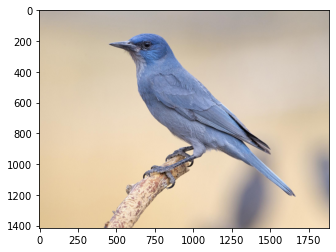

In [6]:
bird = cv2.imread("bird.jpg")
bird = cv2.cvtColor(bird, cv2.COLOR_BGR2RGB)
plt.imshow(bird)
plt.show()

## Espacio RGB

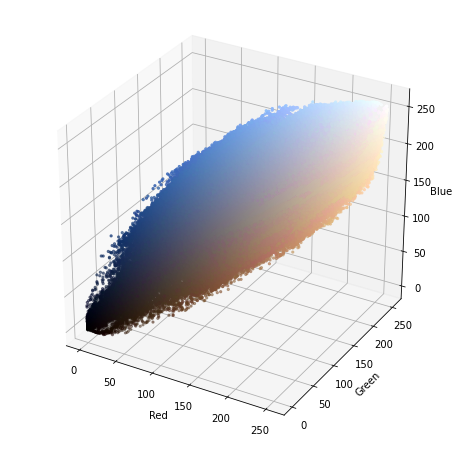

In [7]:
r, g, b = cv2.split(bird)

fig = plt.figure(figsize=(8, 8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = bird.reshape((np.shape(bird)[0] * np.shape(bird)[1], 3))
norm = colors.Normalize(vmin=-1.0, vmax=1.0)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(
    r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

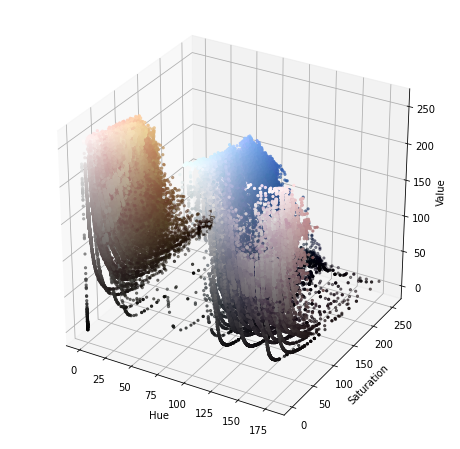

In [27]:
%matplotlib notebook
%matplotlib inline
hsv_bird = cv2.cvtColor(bird, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_bird)

fig = plt.figure(figsize=(8, 8))
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(
    h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

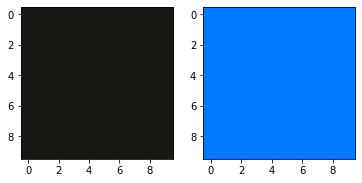

In [105]:
light_blue = (45, 40, 25)
dark_blue = (150, 255, 255)

lw_square = np.full((10, 10, 3), light_blue, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_blue, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

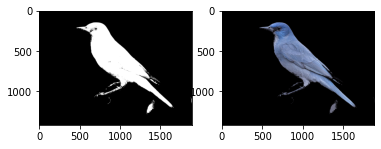

In [106]:
mask_bird = cv2.inRange(hsv_bird, light_blue, dark_blue)
result = cv2.bitwise_and(bird, bird, mask=mask_bird)

plt.subplot(1, 2, 1)
plt.imshow(mask_bird, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

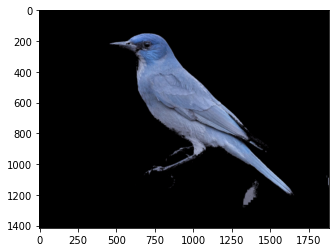

In [107]:
blur = cv2.GaussianBlur(result, (7, 7), 0)
plt.imshow(blur)
plt.show()

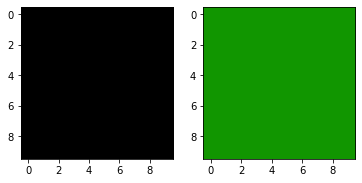

In [108]:
light_blue = (0, 45, 0)
dark_blue = (80, 255, 150)

lw_square = np.full((10, 10, 3), light_blue, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_blue, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

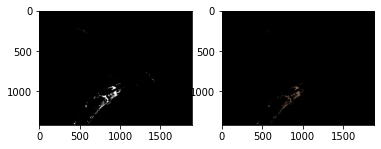

In [109]:
mask_branch = cv2.inRange(hsv_bird, light_blue, dark_blue)
result = cv2.bitwise_and(bird, bird, mask=mask_branch)

plt.subplot(1, 2, 1)
plt.imshow(mask_branch, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

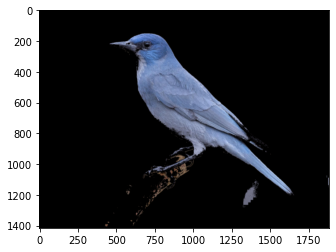

In [112]:
mask_f = mask_bird + mask_branch
result_f = cv2.bitwise_and(bird, bird, mask=mask_f)

blur = cv2.GaussianBlur(result_f, (7, 7), 0)
plt.imshow(blur)
plt.show()